In [1]:
import experiments.runners as runners

from tabpfn import TabPFNClassifier
from sklearn.ensemble import RandomForestClassifier
from data import load_us_perm_visas, load_credit_default

rf_model = RandomForestClassifier()
pfn_model = TabPFNClassifier()

In [ ]:
# if you don't have GPU and cuda, change task_type
# note: catboost requires python 3.12, so need to set up a new evironment (ok, since tabpfn requires only python > 3.9)
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')#, class_weights=class_weights)

In [ ]:
new_run = runners.run(rf_model, load_us_perm_visas)

loading data
trying get pipeline
RandomForest model detected.


In [29]:
new_run.X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
16832,120000,1,3,1,49,0,-1,-1,-1,-1,...,2290,780,8190,4600,3844,2299,780,8190,4600,1081
4223,30000,1,1,2,38,2,0,0,0,0,...,62630,57406,46231,73262,4000,5000,8000,1460,40000,10000
8737,90000,2,2,2,39,0,0,0,0,0,...,42151,37842,30849,28061,2000,2000,1200,1018,1200,710
27881,130000,2,3,1,26,0,0,2,2,2,...,127881,133130,127159,131069,11000,2600,9000,0,6000,5000
29291,50000,1,3,2,26,2,0,0,0,0,...,42097,32394,16658,17006,2047,5728,1300,1194,617,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,50000,1,2,2,32,0,0,0,0,0,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5391,200000,1,1,2,37,2,2,2,2,2,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
861,50000,1,1,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [30]:
new_run.pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('datetime',
                                                  DatetimeFeatureEncoder(features=['year',
                                                                                   'month',
                                                                                   'day',
                                                                                   'weekday']),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x30cf20640>),
                                                 ('cat high c', TargetEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x107f53ce0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x347c08950>)])),
                ('classifier', RandomForestClassifier())])

In [4]:
import warnings
# Ignore FutureWarning, of which TabPFNClassifier has a lot!
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
new_run.X_train

,decision_date,employer_name,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_code,pw_unit_of_pay_9089,pw_source_name_9089,pw_soc_title,country_of_citizenship,class_of_admission,pw_level_9089,pw_amount_9089
156896,2015-01-26,international paper company,memphis,tn,memphis,tn,13-1081,yr,oes,logisticians,poland,l-1,level iv,76045
70049,2014-06-23,sriven systems inc,melville,ny,melville,ny,15-1133,yr,oes,"software developers, systems software",india,h-1b,level iii,102066
246550,2015-12-15,jcg foods of georgia llc d/b/a koch foods,pine mountain valley,ga,pine mountain valley,ga,51-3022,yr,oes,"meat, poultry, and fish cutters and trimmers",south korea,NaN,level i,17098
218834,2015-02-02,the principal consulting inc.,south plainfield,nj,south plainfield,nj,15-1121,yr,oes,computer systems analysts,india,h-1b,level ii,76794
84576,2014-01-22,microland electronics corp.,san jose,ca,san jose,ca,13-2011,yr,oes,accountants and auditors,taiwan,NaN,level ii,69722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124299,2013-11-22,"hattiesburg clinic, pa",hattiesburg,ms,hattiesburg,ms,29-1063,hr,oes,"internists, general",peru,h-1b,level ii,90
274016,2016-03-02,whi hotel llc,wilsonville,or,wilsonville,or,35-3041,yr,oes,"food servers, nonrestaurant",south korea,NaN,level i,19365
140569,2014-10-16,"micron technology, inc.",boise,id,manassas,va,11-9041,yr,other,architectural and engineering managers,india,h-1b,NaN,91640
155916,2015-02-12,"medtronic, inc.",minneapolis,mn,mounds view,mn,15-2041,yr,oes,statisticians,canada,h-1b,level ii,70304


In [31]:
new_run.fit()

Fitting model...
DONE: RandomForestClassifier fit


In [32]:
new_run.predict()
# WARNING: TabPFN took 54 min predicting both class and probability

DONE: RandomForestClassifier class prediction
DONE: RandomForestClassifier probability prediction


Accuracy: 0.8159
F1 Score (macro avg): 0.6746

Classification Report:
              precision    recall  f1-score   support

           0      0.841     0.943     0.889      7742
           1      0.637     0.360     0.460      2158

    accuracy                          0.816      9900
   macro avg      0.739     0.651     0.675      9900
weighted avg      0.797     0.816     0.796      9900



ValueError: y should be a 1d array, got an array of shape (9900, 2) instead.

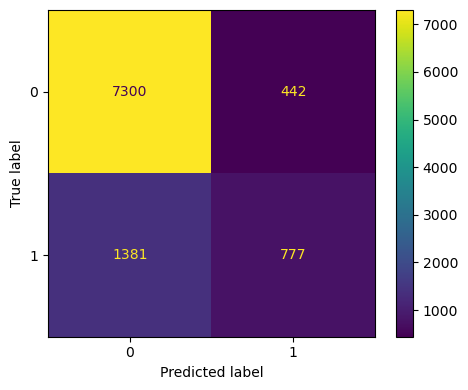

In [33]:
new_run.score()

In [21]:
new_run.prob_predictions[:, 0]

array([0.96, 0.97, 0.92, ..., 0.98, 1.  , 0.91], shape=(117536,))

In [17]:
new_run.y_test

312025    certified
54667     certified
142238    certified
70472     certified
178875    certified
            ...    
131238       denied
119700    certified
37854     certified
327631    certified
6127      certified
Name: case_status, Length: 117536, dtype: object

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(new_run.y_test, new_run.prob_predictions[:, 1], pos_label='certified')

# Calculate AUC score
auc_score = roc_auc_score(new_run.y_test, new_run.prob_predictions[:, 1])
print(f"ROC AUC: {auc_score}")

ROC AUC: 0.8678257866263274


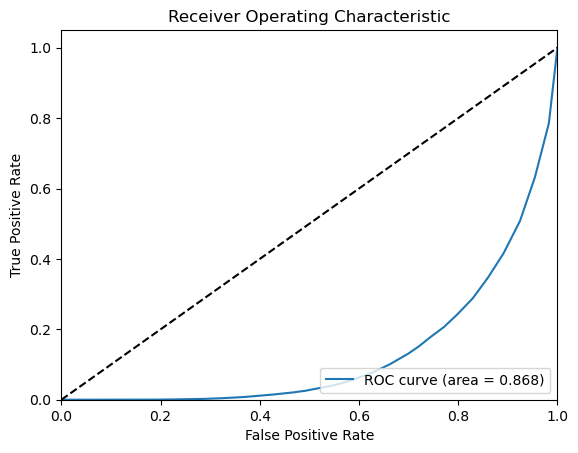

In [27]:
# Optional: plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Testing new data loaders

In [5]:
from data.loaders import load_credit_default

df = load_credit_default(as_frame=True)

In [6]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
